In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# import the dataset
df = pd.read_csv('../data_clean/AA_Supervised_dataset.csv')
df.shape

(300000, 54)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   afspraak_Arbeidsmarkt               300000 non-null  int64
 1   afspraak_Bedrijfsbeheer             300000 non-null  int64
 2   afspraak_Duurzaamheid               300000 non-null  int64
 3   afspraak_Familiebedrijfsmanagement  300000 non-null  int64
 4   afspraak_Financieel                 300000 non-null  int64
 5   afspraak_Groeien en Netwerking      300000 non-null  int64
 6   afspraak_Internationaal Ondernemen  300000 non-null  int64
 7   afspraak_Lidmaatschap               300000 non-null  int64
 8   afspraak_Logistiek en Transport     300000 non-null  int64
 9   afspraak_Plato & Bryo               300000 non-null  int64
 10  afspraak_Technologie en Innovatie   300000 non-null  int64
 11  afspraak_Welt                       300000 non-null 

In [5]:
X = df.drop('ingeschreven', axis=1)
y = df['ingeschreven']

In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [10]:
def get_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
  
  model.add(tf.keras.layers.Dense(32, activation='relu'))
  model.add(tf.keras.layers.Dense(16, activation='relu'))
  
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
  
  return model

In [11]:
model = get_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                3456      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 6081 (23.75 KB)
Trainable params: 6081 (23.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [13]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=512,
)

Epoch 1/20


411/411 [==============================] - 1s 2ms/step - loss: 0.2187 - accuracy: 0.9196 - precision: 0.6728 - recall: 0.1446 - val_loss: 0.1878 - val_accuracy: 0.9242 - val_precision: 0.7363 - val_recall: 0.2108
Epoch 2/20
411/411 [==============================] - 0s 1ms/step - loss: 0.1828 - accuracy: 0.9270 - precision: 0.7244 - recall: 0.2571 - val_loss: 0.1820 - val_accuracy: 0.9272 - val_precision: 0.6940 - val_recall: 0.3040
Epoch 3/20
411/411 [==============================] - 1s 1ms/step - loss: 0.1779 - accuracy: 0.9290 - precision: 0.7279 - recall: 0.2923 - val_loss: 0.1793 - val_accuracy: 0.9285 - val_precision: 0.7095 - val_recall: 0.3137
Epoch 4/20
411/411 [==============================] - 0s 1ms/step - loss: 0.1755 - accuracy: 0.9302 - precision: 0.7331 - recall: 0.3082 - val_loss: 0.1776 - val_accuracy: 0.9300 - val_precision: 0.7431 - val_recall: 0.3078
Epoch 5/20
411/411 [==============================] - 0s 1ms/step - loss: 0.1737 - accuracy: 0.9308 - 

In [14]:
def plot_learning_curves(history):
  plt.figure(figsize=(8, 5))
  for key, style in zip(history.history, ["r-o", "r-*", "b-o", "b-*"]):
    epochs = np.array(history.epoch)
    plt.plot(epochs + 1, history.history[key], style, label=key)
  plt.xlabel("Epoch")
  plt.axis([1, len(history.history['loss']), 0., 1])
  plt.legend(loc="lower left")
  plt.grid()

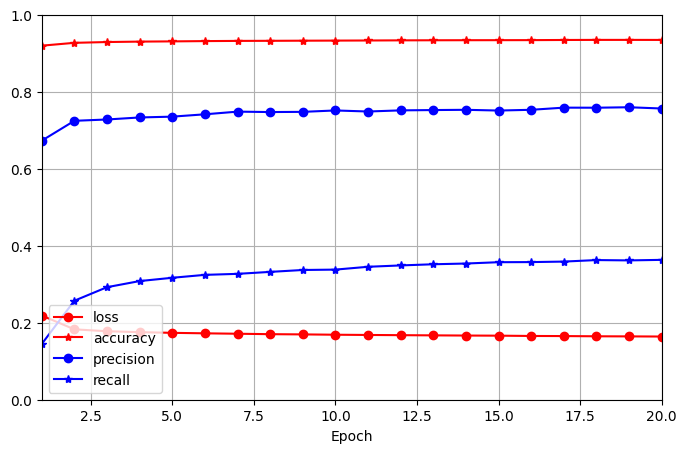

In [15]:
plot_learning_curves(history)